In [35]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [5]:
sns.set()
iris = sns.load_dataset("iris")

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


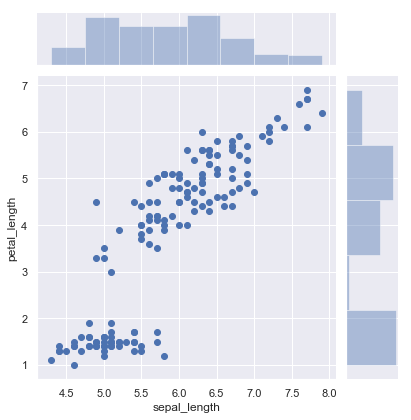

In [10]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris)

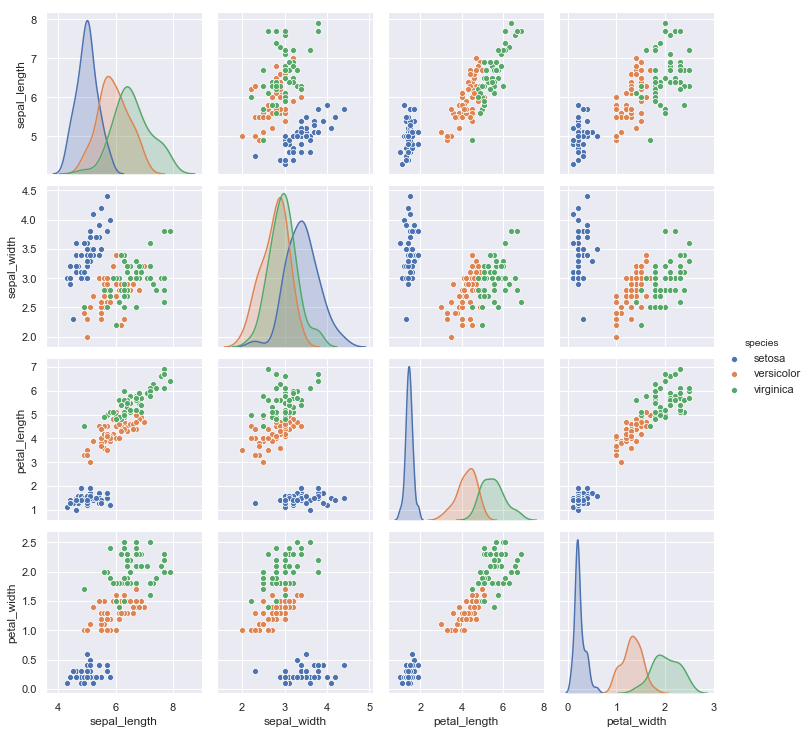

In [11]:
# Setosa linearly seperable from the other two. Can't say the same about the other two from eachother.
sns.pairplot(data=iris, hue="species")

In [21]:
le = preprocessing.LabelEncoder()
le.fit(iris["species"].values)

LabelEncoder()

In [22]:
X = iris.drop(columns = ["species"])
y = le.transform(iris["species"].values)

In [23]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [36]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn = KNeighborsClassifier()
knn_gcv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gcv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
knn_gcv.best_params_

{'n_neighbors': 6}

In [43]:
knn_gcv.best_score_

0.98

In [50]:
y_hat = knn_gcv.predict(X)
hat = iris.copy()
hat["species"] = le.transform(hat["species"].values)
hat["y_hat"] = y_hat

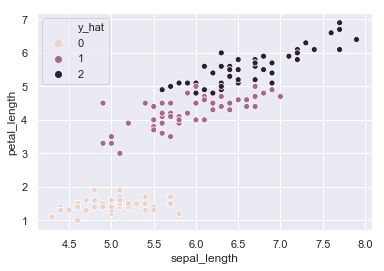

In [58]:
sns.scatterplot(x="sepal_length", y="petal_length",
            hue="y_hat",
            data=hat);